In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/Datasets/DT_data.csv')
df

Mounted at /content/drive


,a1,a2,a3,Outcome
0,True,Hot,High,No
1,True,Hot,High,No
2,False,Hot,High,Yes
3,False,Cool,Normal,Yes
4,False,Cool,Normal,Yes
5,True,Cool,High,No
6,True,Hot,High,No
7,True,Hot,Normal,Yes
8,False,Cool,Normal,Yes
9,False,Cool,High,Yes


In [2]:
df.dtypes

,0
a1,bool
a2,object
a3,object
Outcome,object


In [15]:
# onehotencoder sklearn code
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
df['a1']=encoder.fit_transform(df[['a1']])
df['a2']=encoder.fit_transform(df[['a2']])
df['a3']=encoder.fit_transform(df[['a3']])

In [16]:
df

,a1,a2,a3,Outcome
0,1.0,1.0,0.0,No
1,1.0,1.0,0.0,No
2,0.0,1.0,0.0,Yes
3,0.0,0.0,1.0,Yes
4,0.0,0.0,1.0,Yes
5,1.0,0.0,0.0,No
6,1.0,1.0,0.0,No
7,1.0,1.0,1.0,Yes
8,0.0,0.0,1.0,Yes
9,0.0,0.0,0.0,Yes


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['a1']=encoder.fit_transform(df['a1'])
df['a2']=encoder.fit_transform(df['a2'])
df['a3']=encoder.fit_transform(df['a3'])
# df['Outcome']=encoder.fit_transform(df['Outcome'])



In [11]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

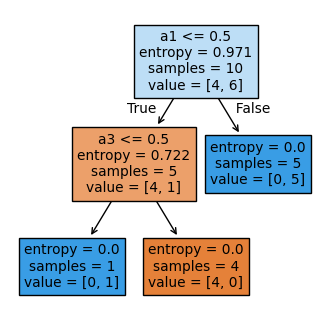

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
tree.plot_tree(clf,feature_names=['a1','a2','a3'],filled=True)
plt.show()